<a href="https://colab.research.google.com/github/TanyaArtt/TanyaArtt.github.io/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B0%D0%B9%D1%82%D0%B0_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ данных сайта Netflix**

Датасет содрежит информацию о фильмах, сериалах и TV-шоу на развлекательном сайте Netflix.

In [26]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 6)})
import warnings; warnings.filterwarnings(action='ignore')

In [2]:
# загружаю данные
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
df = pd.read_csv('netflix_titles.csv')

## **Знакомство с данными**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# проверка пропусков
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

В данных есть пропуски в столбцах с информацией о директоре, актерском составе, стране, дате добавления, рейтинге и продолжительности фильма/сериала. Пропуски не буду трогать.

## **Анализ данных**

### **Соотношение фильмов и сериалов**

In [7]:
# количество фильмов и сериалов на сайте
movie_type = df['type'].value_counts()
movie_type

Movie      6131
TV Show    2676
Name: type, dtype: int64

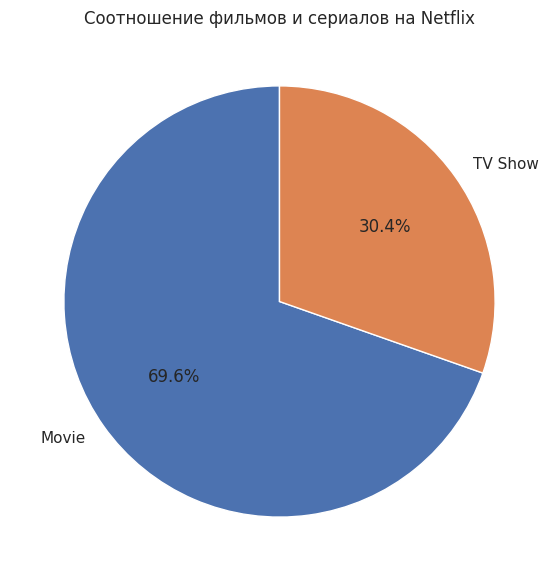

In [8]:
# строю график, чтобы увидеть соотношение
movie_type.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Соотношение фильмов и сериалов на Netflix')
plt.ylabel('')
plt.show()

**Комменатрии:** Фильмов значительно больше, чем сериалов.

### **Информация о дате релиза и выходе на Netflix**

In [12]:
print('Самая ранняя дата релиза:', df['release_year'].min())
print('Самая подзняя дата релиза:', df['release_year'].max())

Самая ранняя дата релиза: 1925
Самая подзняя дата релиза: 2021


In [58]:
print('Самая ранняя дата добавления на netflix:', df['date_added'].min())
print('Самая подзняя дата добалвения на netflix:', df['date_added'].max())

Самая ранняя дата добавления на netflix: 2008-01-01 00:00:00
Самая подзняя дата добалвения на netflix: 2021-09-25 00:00:00


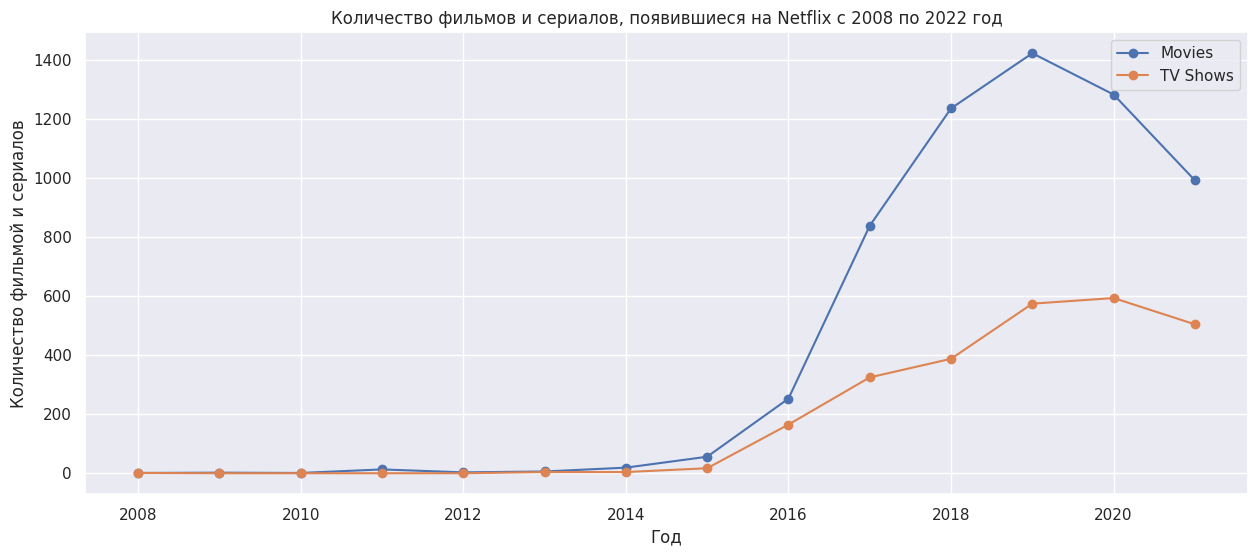

In [62]:
# построим график, который покажет динамику появления фильмов и сериалов на сайте Netflix
movie_per_year = []
tv_shows_per_year = []

for i in range(2008, 2021):
    h = df.loc[(df['type'] == 'Movie') & (df.year_added == i)]
    g = df.loc[(df['type'] == 'TV Show') & (df.year_added == i)]
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

if 2021 not in range(2008, 2021):
    h = df.loc[(df['type'] == 'Movie') & (df.year_added == 2021)]
    g = df.loc[(df['type'] == 'TV Show') & (df.year_added == 2021)]
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

plt.figure(figsize=(15, 6))
plt.plot([i for i in range(2008, 2022)], movie_per_year, marker='o', label='Movies')
plt.plot([i for i in range(2008, 2022)], tv_shows_per_year, marker='o', label='TV Shows')

plt.xlabel('Год')
plt.ylabel('Количество фильмой и сериалов')
plt.title('Количество фильмов и сериалов, появившиеся на Netflix с 2008 по 2022 год')
plt.legend()
plt.show()

**Комментарии:** Самый пик по количеству добавленных фильмов в год пришлеся на 2019 год, а у сериалов - на 2020, затем в обоих случаях показатель снизился.

### **Страны происхождения фильмов и сериалов**

In [23]:
# найдем топ-15 стран по количеству фильмов и сериалов
content_country = df.groupby('country').agg({'show_id':'count'}).sort_values(by ='show_id',ascending=False).reset_index().head(15)
content_country

,country,show_id
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


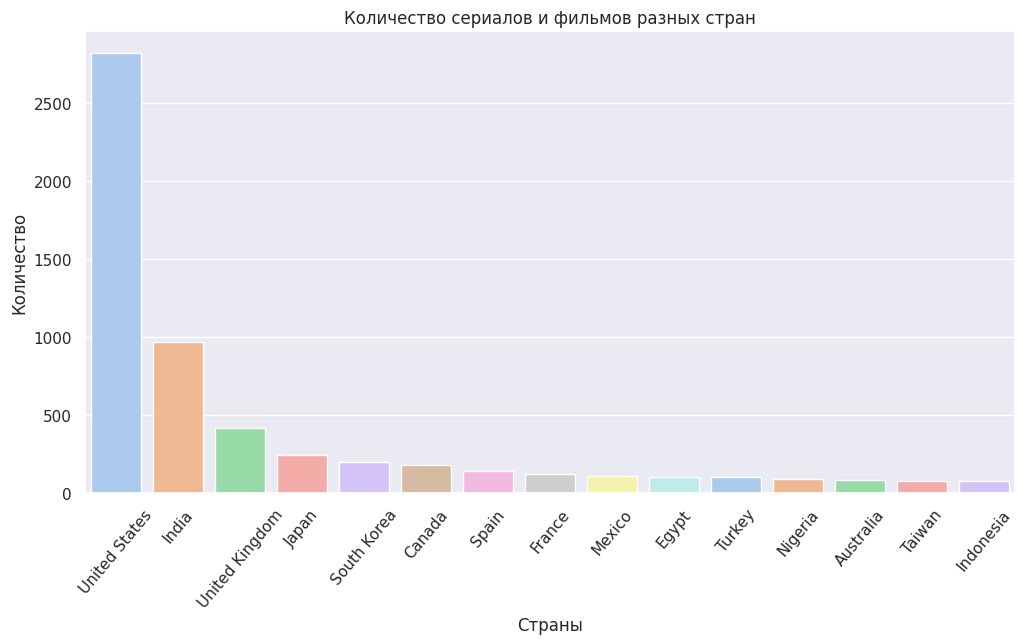

In [27]:
# посмотрим на графике
colors = sns.color_palette("pastel", len(content_country))

sns.barplot(data=content_country, x='country', y='show_id', palette=colors)
plt.title('Количество сериалов и фильмов разных стран')
plt.xlabel('Страны')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

**Комментарии:** Посмотрим, будут ли отличаться страны по фильмам и сериалам отдельно.

In [33]:
# топ-15 стран по количеству фильмов
# фильтрация фильмов
movies_df = df[df['type'] == 'Movie']
movie_content_country = movies_df.groupby('country').agg({'show_id':'count'}).sort_values(by='show_id', ascending=False).reset_index().head(10)
movie_content_country

,country,show_id
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


In [34]:
# топ-15 стран по количеству сериалов
# фильтрация сериалов
tvshow_df = df[df['type'] == 'TV Show']
tvshow_content_country = tvshow_df.groupby('country').agg({'show_id':'count'}).sort_values(by='show_id', ascending=False).reset_index().head(10)
tvshow_content_country

,country,show_id
0,United States,760
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Australia,48
9,Spain,48


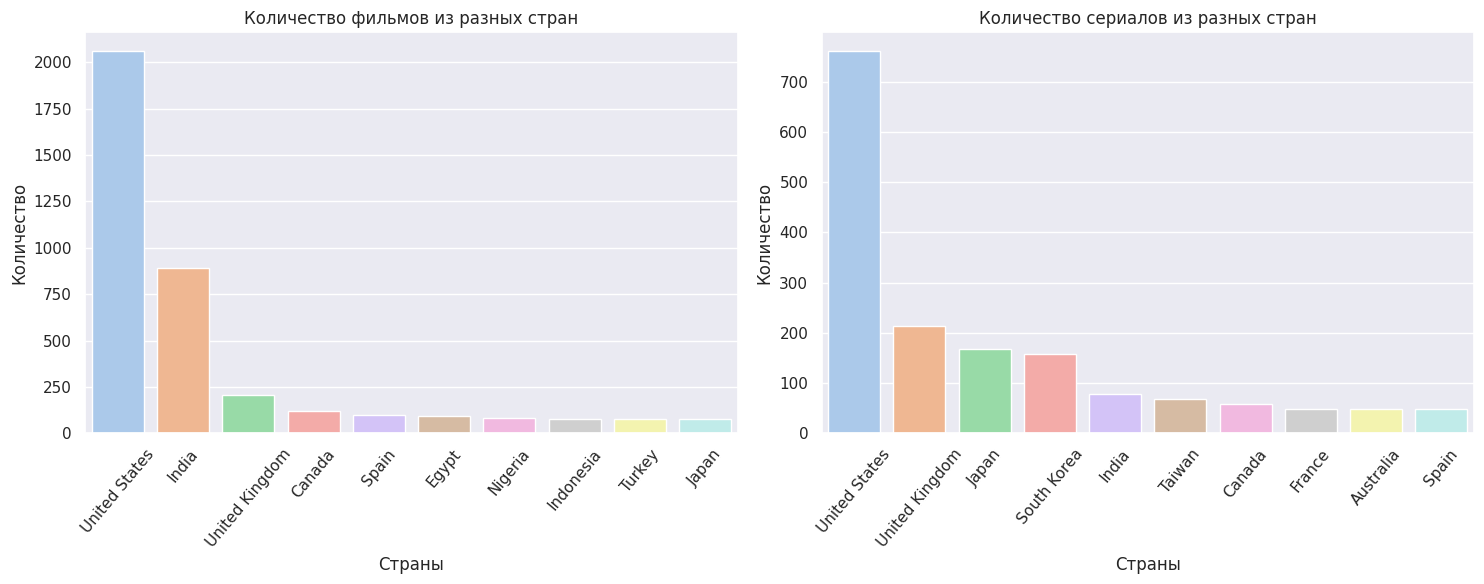

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График для количества фильмов
colors = sns.color_palette("pastel", len(movie_content_country))
sns.barplot(data=movie_content_country, x='country', y='show_id', palette=colors, ax=axes[0])
axes[0].set_title('Количество фильмов из разных стран')
axes[0].set_xlabel('Страны')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=50)

# График для количества сериалов
colors = sns.color_palette("pastel", len(tvshow_content_country))
sns.barplot(data=tvshow_content_country, x='country', y='show_id', palette=colors, ax=axes[1])
axes[1].set_title('Количество сериалов из разных стран')
axes[1].set_xlabel('Страны')
axes[1].set_ylabel('Количество')
axes[1].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

**Комментарии:** Топ стран по фильмам и сериалам/TV-шоу отличается между собой. Но США занимают первое место по производству всех видов контента.

### **Режиссеры фильмов и сериалов**

In [42]:
# проверим количество категорий на сайте
print('Общее количество режиссеров:', df['director'].nunique())

Общее количество режиссеров: 4528


In [37]:
# найдем топ-15 режиссеров по количеству фильмов и сериалов
top_director = df.groupby('director').agg({'show_id':'count'}).sort_values(by ='show_id',ascending=False).reset_index().head(15)
top_director

,director,show_id
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


### **Топ-10 режиссеров из шести стран с самым большим количеством выпущенных фильмов и сериалов**

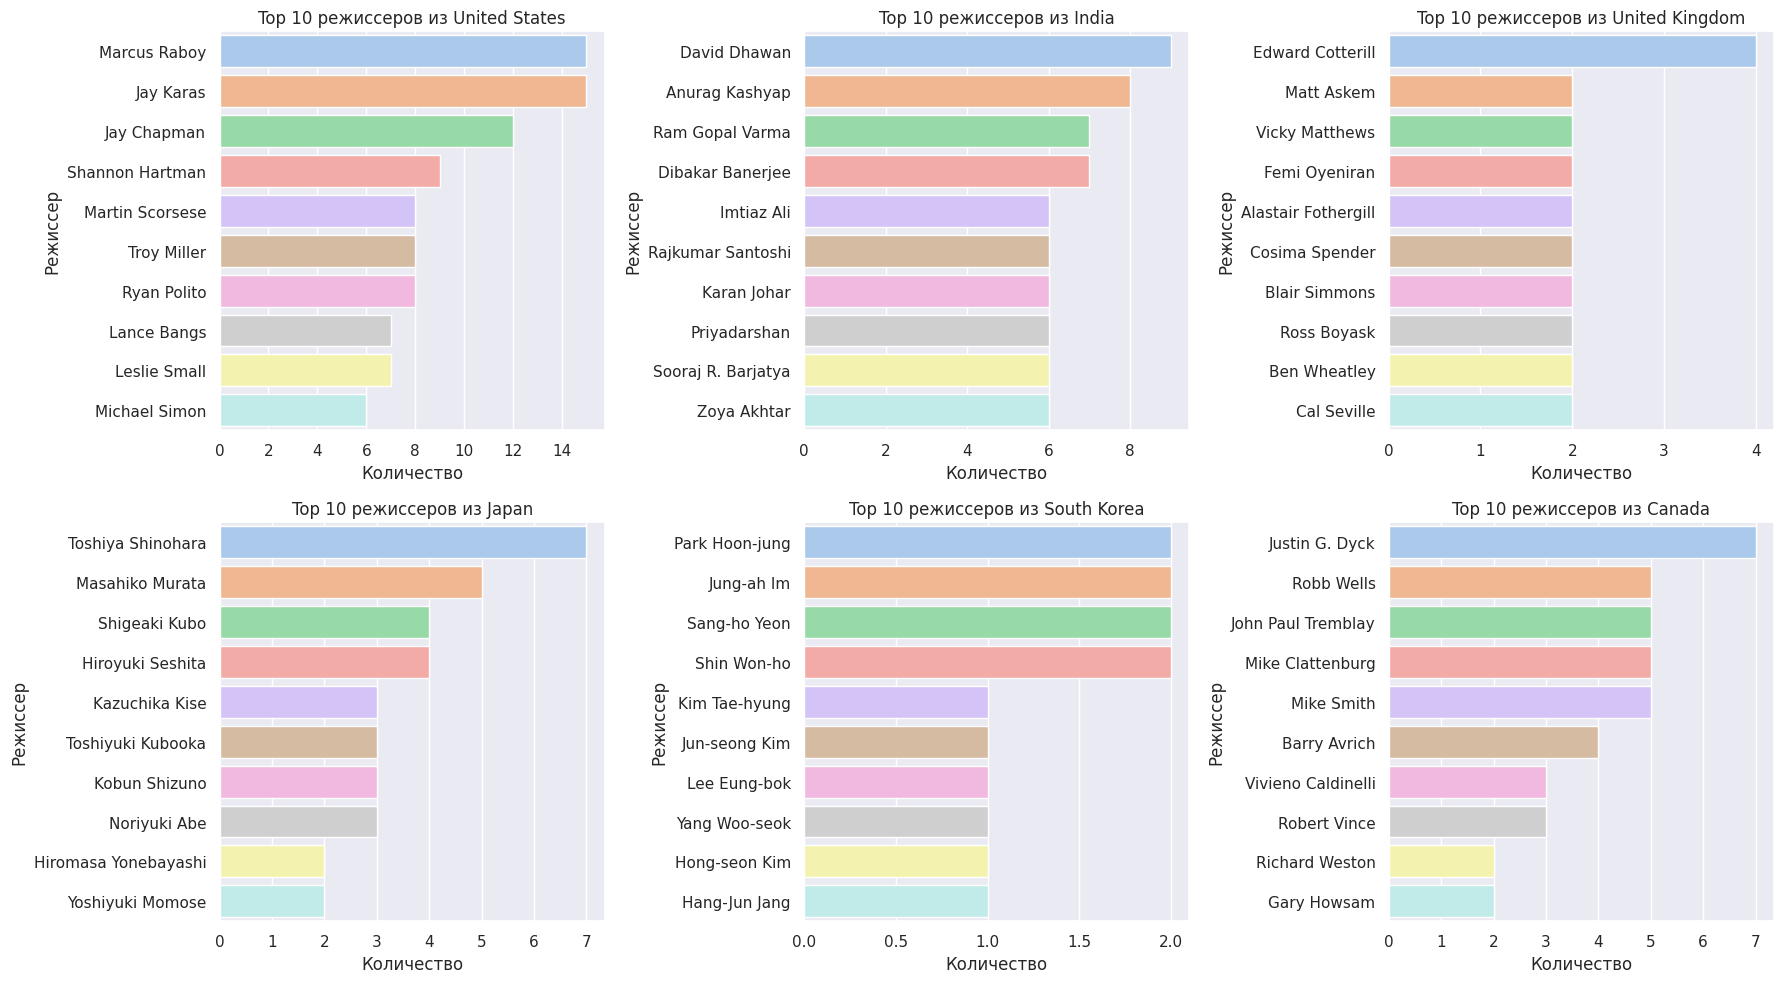

In [40]:
selected_countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada']

# топ-10 режиссеров по фильмам и сериалам для выбранных стран
top_directors_list = []
for country in selected_countries:
    directors_df = df[df['country'] == country]['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
    top_directors = directors_df.value_counts().head(10)
    top_directors.name = country  # Добавляем имя страны к топ-режиссерам
    top_directors_list.append(top_directors)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# построение графиков для каждой страны
for i, ax in enumerate(axes.flat):
    country_top_directors = top_directors_list[i]
    colors = sns.color_palette("pastel", len(country_top_directors))

    sns.barplot(x=country_top_directors.values, y=country_top_directors.index, palette=colors, ax=ax)
    ax.set_title(f'Top 10 режиссеров из {country_top_directors.name}')
    ax.set_xlabel('Количество')
    ax.set_ylabel('Режиссер')

plt.tight_layout()
plt.show()

### **Рейтинги**

In [43]:
# проверим количество рейтингов
print('Общее количество рейтинов:', df['rating'].nunique())

Общее количество рейтинов: 17


In [44]:
# найдем топ-15 режиссеров по количеству фильмов и сериалов
top_director = df.groupby('rating').agg({'show_id':'count'}).sort_values(by ='show_id',ascending=False).reset_index()
top_director

,rating,show_id
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


### **Жарны фильмов и сериалов/TV-шоу**

In [49]:
# посмотрим, какие жанры у фильмов и сериалов есть в датасете
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

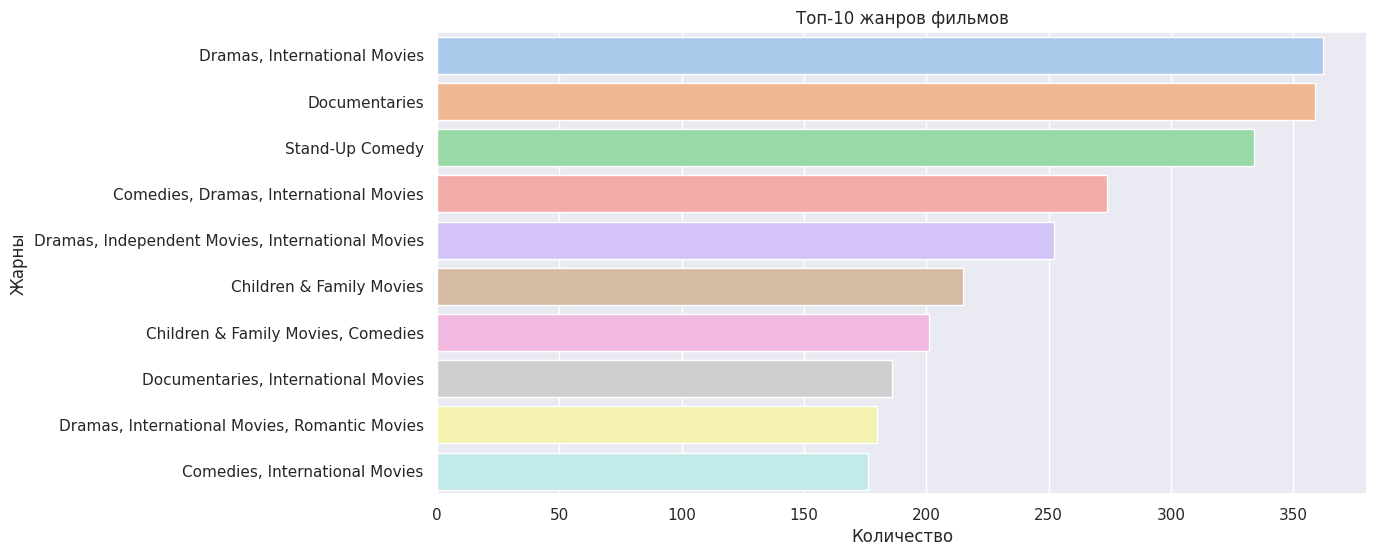

In [56]:
# найдем топ-10 жанров для фильмов
movie_genres = df[df['type'] == 'Movie']
movie_genres_top = movie_genres.groupby('listed_in').agg({'show_id':'count'}).sort_values(by ='show_id',ascending=False).reset_index().head(10)

colors = sns.color_palette("pastel", len(movie_genres_top))

sns.barplot(data=movie_genres_top, y='listed_in', x='show_id', palette=colors)
plt.title('Топ-10 жанров фильмов')
plt.xlabel('Количество')
plt.ylabel('Жарны')
plt.show()

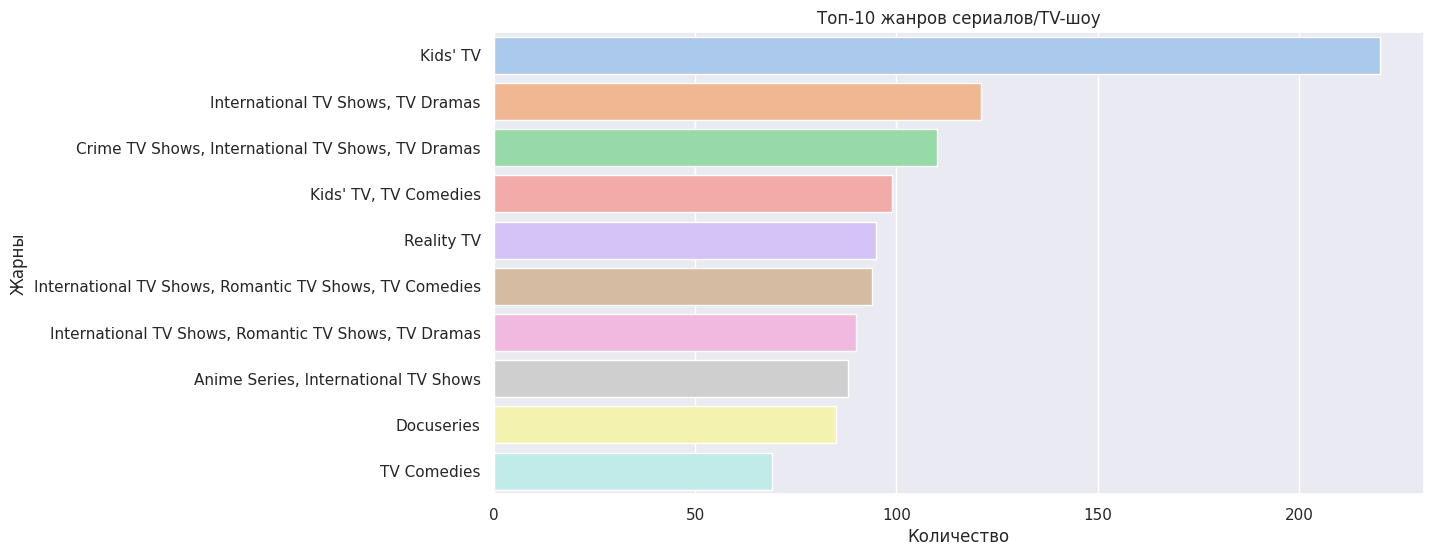

In [57]:
# посмотрим на такой же топ у сериалов и передач
tv_show_genres = df[df['type'] == 'TV Show']
tv_show_genres_top = tv_show_genres.groupby('listed_in').agg({'show_id':'count'}).sort_values(by ='show_id',ascending=False).reset_index().head(10)

colors = sns.color_palette("pastel", len(tv_show_genres_top))
sns.barplot(data=tv_show_genres_top, y='listed_in', x='show_id', palette=colors)
plt.title('Топ-10 жанров сериалов/TV-шоу')
plt.xlabel('Количество')
plt.ylabel('Жарны')
plt.show()

**Комментарии:** В случае с фильмами можно выделить три жанра, не сильно отстающих друг от друга: драмы/интернациональные фильмы, документальное кино и комедии. У сериалов и TV-шоу явно лидирует жанр для детей.